In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction import text
import re
#*******load module***********

I extracted all records from 7 job posting data files that provided in blog. Among them I extracted positions that posted by Amazon and Google to do further analysis.

In [2]:

rawAmazon=pd.read_csv('E:/JOB_seeker/jobcome/2020/Dataincubator/proposal/dataset/temp_datalab_records_job_listings/Amazon.csv')
rawGoogle=pd.read_csv('E:/JOB_seeker/jobcome/2020/Dataincubator/proposal/dataset/temp_datalab_records_job_listings/Google.csv')
makeAmazon=rawAmazon.copy()
makeGoogle=rawGoogle.copy()
#*******load data***********
#makeAmazon.columns
#titlesA=makeAmazon['title'].value_counts().reset_index()
#titlesG=makeGoogle['title'].value_counts().reset_index()
#np.sum(makeGoogle['date_DA']!=makeGoogle['as_of_date'])
#*******statistics***********


E:\DS\Anaconda3\envs\mypython3.6\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7,11,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\DS\Anaconda3\envs\mypython3.6\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7,11,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#============data clean procedure
def initialClean(dataset):
    dataset=dataset.loc[~(dataset['isin']=='isin'),:]
    dataset=dataset.loc[~(dataset['posted_date'].isna()),:]
    dataset=dataset.astype(str)
    single=dataset.nunique()
    single=single.loc[single==1].index.tolist()
    singlelist=single
    dataset.drop(singlelist,axis=1,inplace=True)
    if 'location_string' in dataset.columns: dataset.drop('location_string',axis=1,inplace=True)
#    dataset['date_DA']=dataset['date_added'].apply(lambda x: x.split(' ')[0])
#    dataset['time_DA']=dataset['date_added'].apply(lambda x: x.split(' ')[1])
#    dataset.drop('date_added',axis=1,inplace=True)
#    dataset['date_DU']=dataset['date_updated'].apply(lambda x: x.split(' ')[0])
#    dataset['time_DU']=dataset['date_updated'].apply(lambda x: x.split(' ')[1])
#    dataset.drop('date_updated',axis=1,inplace=True)
    dataset['year_PD']=dataset['posted_date'].apply(lambda x: int(x.split('-')[0]))
    dataset['month_PD']=dataset['posted_date'].apply(lambda x: int(x.split('-')[1]))
    dataset['day_PD']=dataset['posted_date'].apply(lambda x: int(x.split('-')[2]))
    dataset.drop('posted_date',axis=1,inplace=True)
    return dataset
makeAmazon=initialClean(makeAmazon)

I found that in Amazon data there is purpose specification in job title such as some jobs are recurited for Alexa development. So I will start with Alexa. And I performed tokenization on job titles using one-gram and two-gram.

In [4]:
#=================Amazon_Alexa_title_tokenize
Alexa=makeAmazon.loc[makeAmazon['title'].str.lower().str.contains('alexa'),:].reset_index(drop=True)
vectorizer = CountVectorizer(preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()),ngram_range=(1, 2))
titleToken = vectorizer.fit_transform(Alexa['title'])
tokenname=['title_'+v for v in vectorizer.get_feature_names()]
titleToken=pd.DataFrame(titleToken.toarray(),columns = tokenname)
titleToken=titleToken.merge(Alexa['year_PD'],left_index =True,right_index =True,how='left')
titleToken['year_PD'].unique()
titlerank2016=titleToken.loc[titleToken['year_PD']==2016,:].iloc[:,:-1].sum().sort_values(ascending=False)
titlerank2017=titleToken.loc[titleToken['year_PD']==2017,:].iloc[:,:-1].sum().sort_values(ascending=False)
titlerank2018=titleToken.loc[titleToken['year_PD']==2018,:].iloc[:,:-1].sum().sort_values(ascending=False)
takeoutlist=['alexa','amazon']
titlerank2016=titlerank2016.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2016.index]]
titlerank2017=titlerank2017.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2017.index]]
titlerank2018=titlerank2018.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2018.index]]

titlerank2016=titlerank2016.loc[titlerank2016!=0]
titlerank2017=titlerank2017.loc[titlerank2017!=0]
titlerank2018=titlerank2018.loc[titlerank2018!=0]


Tokens and their appear frequency are grouped by years. And some obvious redundant token are deleted such as 'amazon' and 'alexa'. Next we will explore newly shown token for each year to see if any informations can be dicovered.

In [5]:
#=====================token differences
in2017notin2016=[True if t not in titlerank2016.index else False for t in titlerank2017.index]
in2017notin2016=titlerank2017.loc[in2017notin2016]
in2018notin2017=[True if t not in titlerank2017.index else False for t in titlerank2018.index]
in2018notin2017=titlerank2018.loc[in2018notin2017]
in2018notin2016=[True if t not in titlerank2016.index else False for t in titlerank2018.index]
in2018notin2016=titlerank2018.loc[in2018notin2016]
location='kendall square cambridge'
boolin2018notin2017=[False if i.split('_')[1] in location else True for i in in2018notin2017.index.tolist()]
in2018notin2017=in2018notin2017.loc[boolin2018notin2017]
in2017notin2016_dict={i.split('_')[1]:j for i,j in in2017notin2016.iteritems()}
in2018notin2017_dict={i.split('_')[1]:j for i,j in in2018notin2017.iteritems()}
in2018notin2016_dict={i.split('_')[1]:j for i,j in in2018notin2016.iteritems()}
 


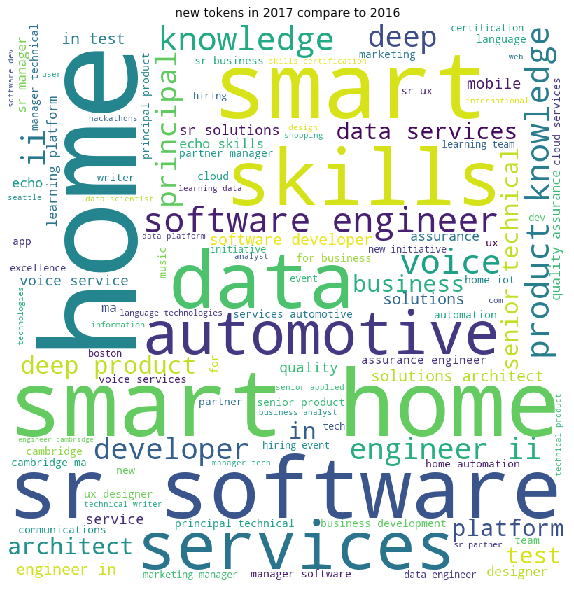

In [6]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2017notin2016_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2017 compare to 2016')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 



From the plot, we can see that 'smart home' clearly occupys the main spot. Other intersting points includes 'voice', 'mobile', 'automotive', 'deep', 'services'. I will elabrate them in my proposal.

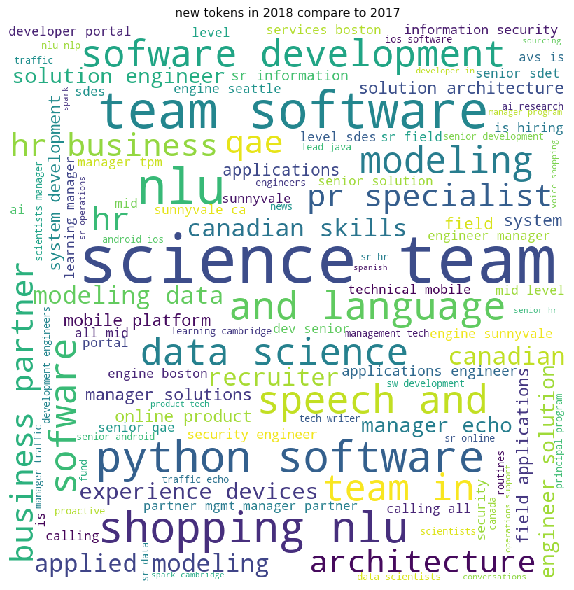

In [7]:

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2018notin2017_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2018 compare to 2017')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

From the plot, we can see that 'nlu','speech','data science', 'shopping','modeling','language' have a fair share of spots on this map. I will elabrate them in my proposal.

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
titleToken_M = vectorizer.fit_transform(Alexa['title'])
tokenname=['title_'+v for v in vectorizer.get_feature_names()]
titleToken_M=pd.DataFrame(titleToken_M.toarray(),columns = tokenname)
titleToken_M=titleToken_M.merge(Alexa[['month_PD','year_PD']],left_index =True,right_index =True,how='left')
#titleToken['year_PD'].unique()
titlerank2016=titleToken_M.loc[titleToken_M['year_PD']==2016,:].iloc[:,:-1]
titlerank2017=titleToken_M.loc[titleToken_M['year_PD']==2017,:].iloc[:,:-1]
titlerank2018=titleToken_M.loc[titleToken_M['year_PD']==2018,:].iloc[:,:-1]

titlerank2016=titlerank2016.reset_index(drop=True)
titlerank2017=titlerank2017.reset_index(drop=True)
titlerank2018=titlerank2018.reset_index(drop=True)

def aggtable_2factor(onefactor,titles):
    monthlist=['month_'+str(int(i)) for i in range(1,13)]
    title_month_table=np.zeros([len(titles),12])
    title_month_table=pd.DataFrame(title_month_table,columns=monthlist,index=titles)
    for t in titles:
        monthcount=onefactor.loc[onefactor[t]==1,[t,'month_PD']].groupby('month_PD')[t].agg('count')
        for i,j in monthcount.iteritems():
            title_month_table.loc[title_month_table.index==t,title_month_table.columns=='month_'+str(int(i))]=j
    title_month_uncross_table=title_month_table.reset_index()
    title_month_uncross_table.columns=['titles' if t=='index' else t for t in title_month_uncross_table.columns]
    title_month_uncross_table=pd.melt(title_month_uncross_table, 
                id_vars='titles', 
                value_vars=list(title_month_uncross_table.columns[1:]), # list of days of the week
                var_name='month', 
                value_name='counts')
    return title_month_uncross_table

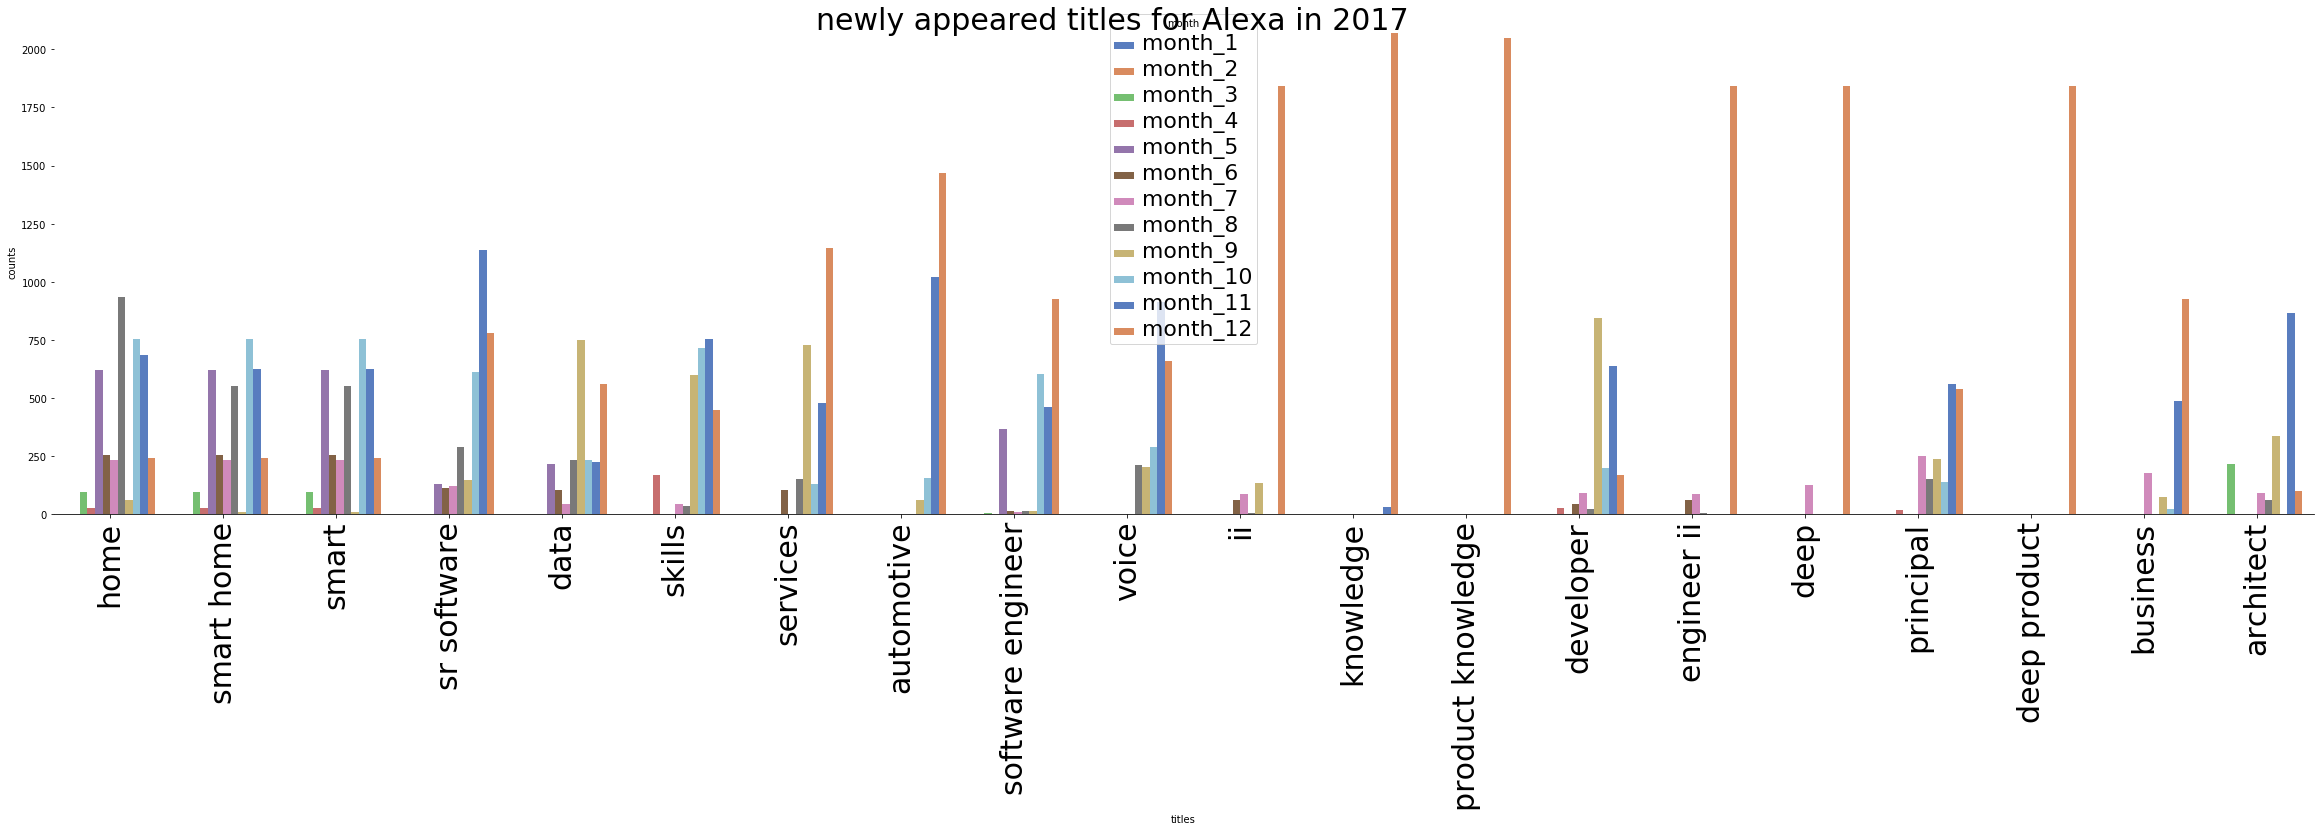

In [9]:
newtitle2017=in2017notin2016.index.tolist()[:20]
titleMonthAlexa2017=aggtable_2factor(titlerank2017,newtitle2017)
Alexa2017 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonthAlexa2017,
                height=6, kind="bar", palette="muted",legend_out=False)
Alexa2017.despine(left=True)
Alexa2017.fig.suptitle('newly appeared titles for Alexa in 2017',fontsize=30)
Alexa2017.set_ylabels("counts")
Alexa2017.set_xticklabels([t.split('_')[1]for t in newtitle2017[:20]],rotation=90,fontsize=30)
for ax in Alexa2017.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Alexa2017.fig.set_size_inches(40,8)

[article1](https://www.fastcompany.com/40474833/amazons-alexa-is-a-real-smart-home-platform-now)

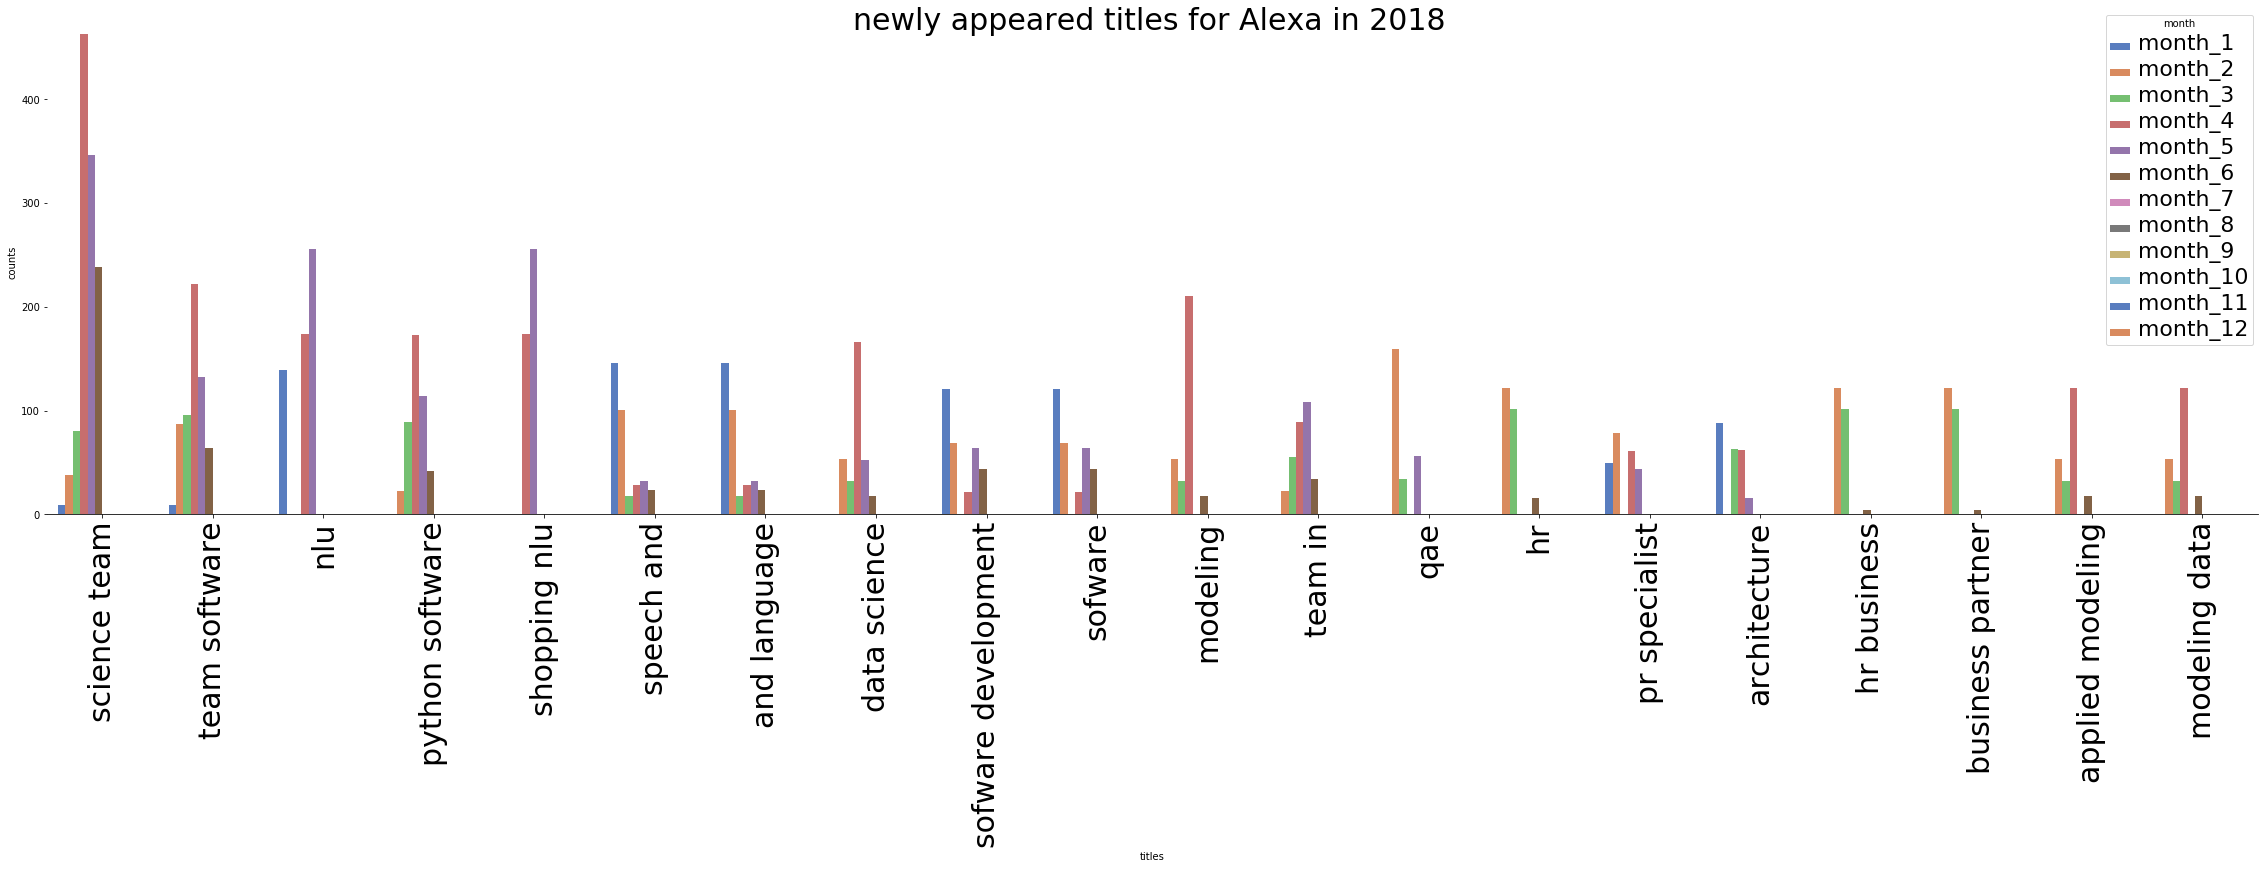

In [10]:
newtitle2018=in2018notin2017.index.tolist()[:20]
titleMonthAlexa2018=aggtable_2factor(titlerank2018,newtitle2018)
Alexa2018 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonthAlexa2018,
                height=6, kind="bar", palette="muted",legend_out=False)
Alexa2018.despine(left=True)
Alexa2018.fig.suptitle('newly appeared titles for Alexa in 2018',fontsize=30)
Alexa2018.set_xticklabels([t.split('_')[1]for t in newtitle2018[:20]],rotation=90,fontsize=30)
for ax in Alexa2018.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Alexa2018.set_ylabels("counts")
Alexa2018.fig.set_size_inches(40,8)


[article1](https://www.forbes.com/sites/andriacheng/2018/07/26/what-amazon-is-doing-to-keep-alexa-in-the-lead/#10b1d6fd7fc6)

In [11]:
my_stop_words=["sr","sineor","amazon","i", "ii", "iii", "iv", "v", "vi", "vii", "viii"]
all_stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)
vectorizer = CountVectorizer(preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()),ngram_range=(1, 2),stop_words=all_stop_words,binary=True)
titleToken = vectorizer.fit_transform(makeAmazon['title'])
tokenname=['title_'+v for v in vectorizer.get_feature_names()]
#titleToken=pd.DataFrame(titleToken.toarray(),columns = tokenname)
#titleToken=titleToken.merge(makeAmazon['year_PD'],left_index =True,right_index =True,how='left')
print(makeAmazon['year_PD'].unique())
titlerank2012=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2012)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2013=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2013)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2014=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2014)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2015=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2015)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2016=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2016)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2017=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2017)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)
titlerank2018=pd.Series(np.asarray(titleToken[np.where(makeAmazon['year_PD']==2018)[0]].sum(axis=0)).flatten(),index = tokenname).sort_values(ascending=False)

titlerank2012=titlerank2012.loc[titlerank2012!=0]
titlerank2013=titlerank2013.loc[titlerank2013!=0]
titlerank2014=titlerank2014.loc[titlerank2014!=0]
titlerank2015=titlerank2015.loc[titlerank2015!=0]
titlerank2016=titlerank2016.loc[titlerank2016!=0]
titlerank2017=titlerank2017.loc[titlerank2017!=0]
titlerank2018=titlerank2018.loc[titlerank2018!=0]
#=====================token differences
in2013notin2012=[True if t not in titlerank2012.index else False for t in titlerank2013.index]
in2013notin2012=titlerank2013.loc[in2013notin2012]
in2014notin2013=[True if t not in titlerank2013.index else False for t in titlerank2014.index]
in2014notin2013=titlerank2014.loc[in2014notin2013]
in2015notin2014=[True if t not in titlerank2014.index else False for t in titlerank2015.index]
in2015notin2014=titlerank2015.loc[in2015notin2014]
in2016notin2015=[True if t not in titlerank2015.index else False for t in titlerank2016.index]
in2016notin2015=titlerank2016.loc[in2016notin2015]
in2017notin2016=[True if t not in titlerank2016.index else False for t in titlerank2017.index]
in2017notin2016=titlerank2017.loc[in2017notin2016]
in2018notin2017=[True if t not in titlerank2017.index else False for t in titlerank2018.index]
in2018notin2017=titlerank2018.loc[in2018notin2017]

location='kendall square cambridge'
boolin2018notin2017=[False if i.split('_')[1] in location else True for i in in2018notin2017.index.tolist()]
in2018notin2017=in2018notin2017.loc[boolin2018notin2017]

in2013notin2012_dict={i.split('_')[1]:j for i,j in in2013notin2012.iteritems()}
in2014notin2013_dict={i.split('_')[1]:j for i,j in in2014notin2013.iteritems()}
in2015notin2014_dict={i.split('_')[1]:j for i,j in in2015notin2014.iteritems()}
in2016notin2015_dict={i.split('_')[1]:j for i,j in in2016notin2015.iteritems()}
in2017notin2016_dict={i.split('_')[1]:j for i,j in in2017notin2016.iteritems()}
in2018notin2017_dict={i.split('_')[1]:j for i,j in in2018notin2017.iteritems()}


[2017 2016 2015 2013 2014 2012 2018]


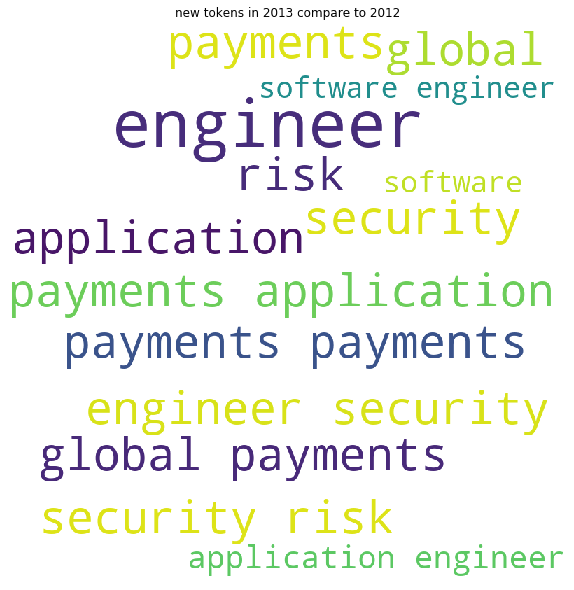

In [12]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2013notin2012_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2013 compare to 2012')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [13]:
def findNameIdx(target,total):
    output=[]
    for t in target:
        output.extend([total.index(t)])
    return output
newtitle2013=in2013notin2012.index.tolist()[:20]
newtitle2014=in2014notin2013.index.tolist()[:20]
newtitle2015=in2015notin2014.index.tolist()[:20]
newtitle2016=in2016notin2015.index.tolist()[:20]
newtitle2017=in2017notin2016.index.tolist()[:20]
newtitle2018=in2018notin2017.index.tolist()[:20]

newtitle2013_idx=findNameIdx(newtitle2013,tokenname)
newtitle2014_idx=findNameIdx(newtitle2014,tokenname)
newtitle2015_idx=findNameIdx(newtitle2015,tokenname)
newtitle2016_idx=findNameIdx(newtitle2016,tokenname)
newtitle2017_idx=findNameIdx(newtitle2017,tokenname)
newtitle2018_idx=findNameIdx(newtitle2018,tokenname)

title2013_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2013_idx)].toarray(),columns = newtitle2013)#tokenname
title2013_M=title2013_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2013)[0],:].reset_index(drop=True)
title2014_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2014_idx)].toarray(),columns = newtitle2014)#tokenname
title2014_M=title2014_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2014)[0],:].reset_index(drop=True)
title2015_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2015_idx)].toarray(),columns = newtitle2015)#tokenname
title2015_M=title2015_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2015)[0],:].reset_index(drop=True)
title2016_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2016_idx)].toarray(),columns = newtitle2016)#tokenname
title2016_M=title2016_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2016)[0],:].reset_index(drop=True)
title2017_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2017_idx)].toarray(),columns = newtitle2017)#tokenname
title2017_M=title2017_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2017)[0],:].reset_index(drop=True)
title2018_M=pd.DataFrame(titleToken.tocsc()[:,np.asarray(newtitle2018_idx)].toarray(),columns = newtitle2018)#tokenname
title2018_M=title2018_M.merge(makeAmazon['month_PD'],left_index =True,right_index =True,how='left').loc[np.where(makeAmazon['year_PD']==2018)[0],:].reset_index(drop=True)


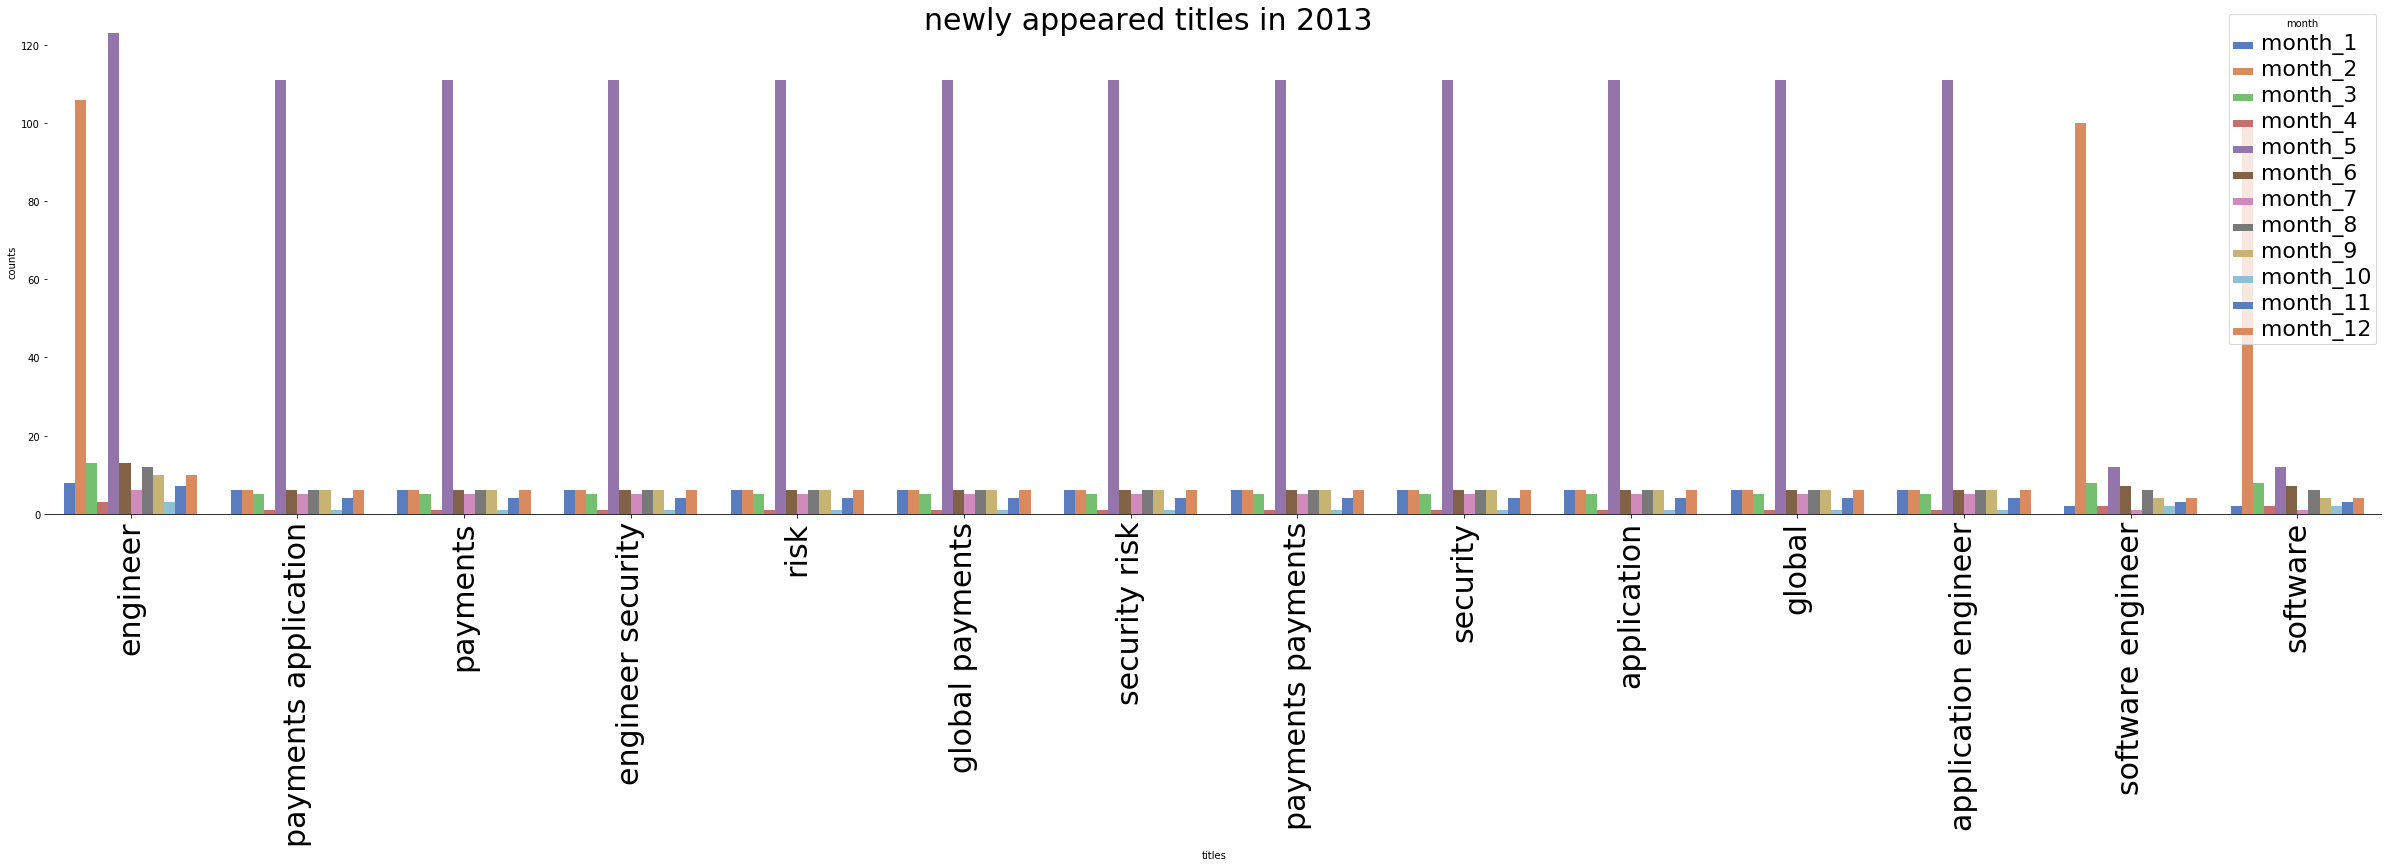

In [14]:
titleMonth2013=aggtable_2factor(title2013_M,newtitle2013)
Amazon2013 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2013,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2013.despine(left=True)
Amazon2013.fig.suptitle('newly appeared titles in 2013',fontsize=30)
Amazon2013.set_ylabels("counts")
Amazon2013.set_xticklabels([t.split('_')[1]for t in newtitle2013],rotation=90,fontsize=30)
for ax in Amazon2013.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2013.fig.set_size_inches(40,8)

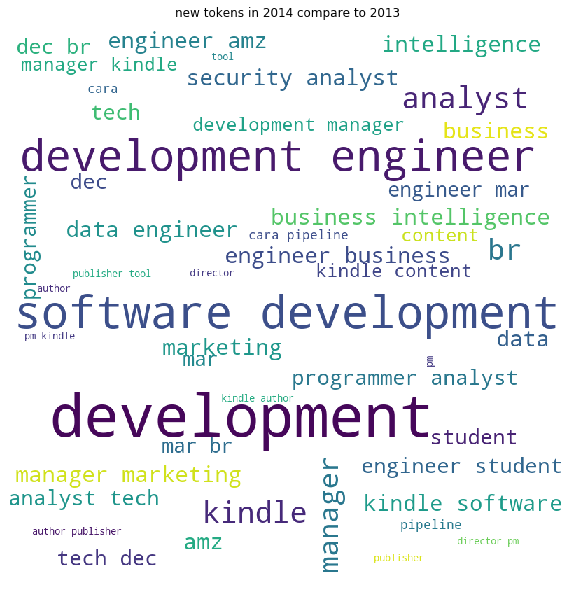

In [15]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2014notin2013_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2014 compare to 2013')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

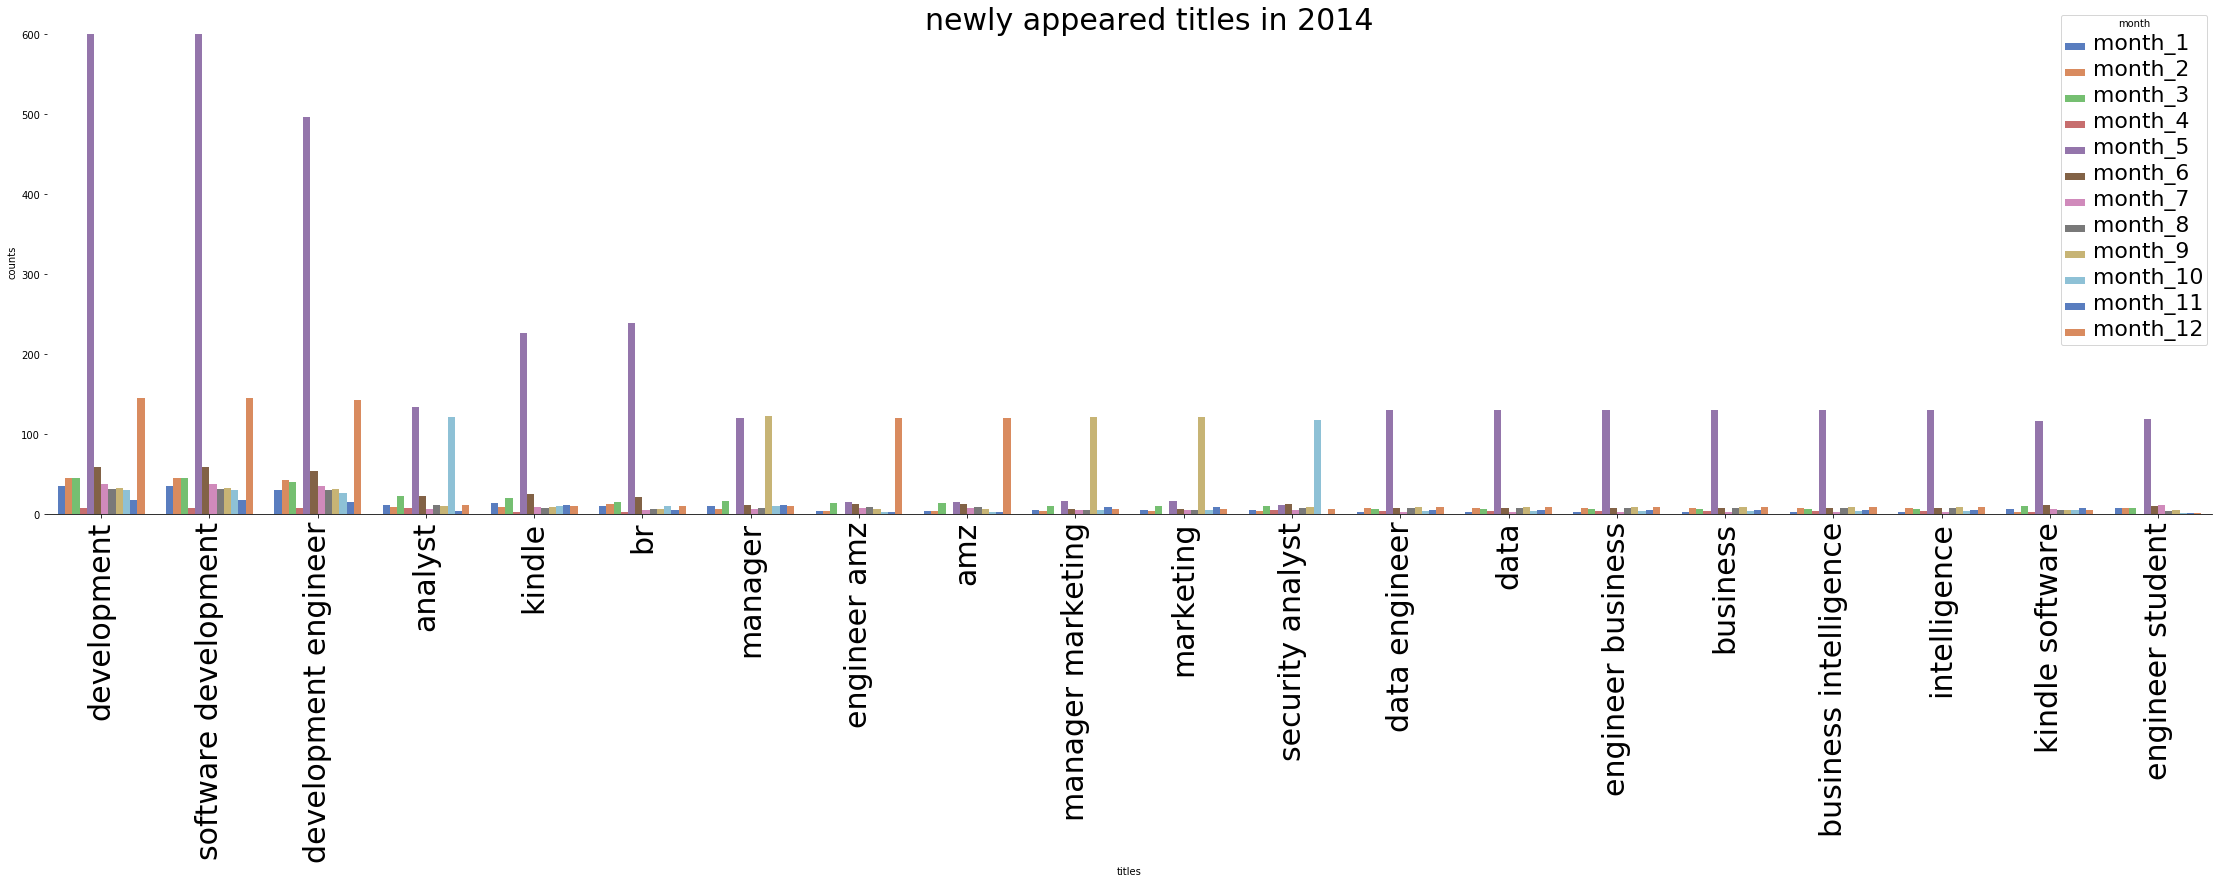

In [16]:
titleMonth2014=aggtable_2factor(title2014_M,newtitle2014)
Amazon2014 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2014,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2014.despine(left=True)
Amazon2014.fig.suptitle('newly appeared titles in 2014',fontsize=30)
Amazon2014.set_ylabels("counts")
Amazon2014.set_xticklabels([t.split('_')[1]for t in newtitle2014],rotation=90,fontsize=30)
for ax in Amazon2014.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2014.fig.set_size_inches(40,8)

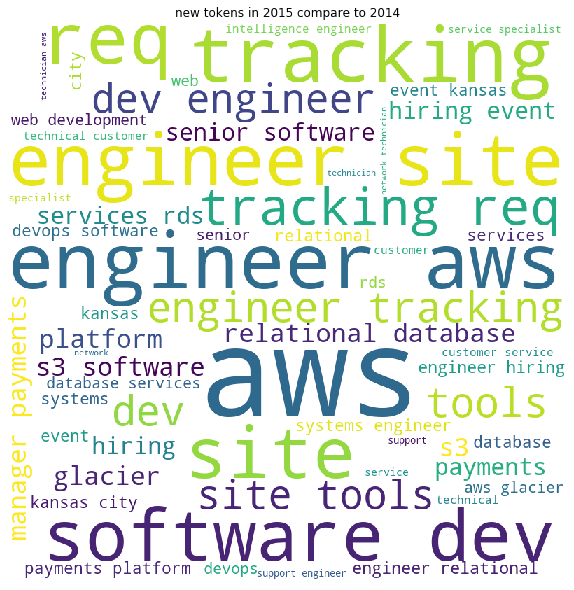

In [17]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2015notin2014_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2015 compare to 2014')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

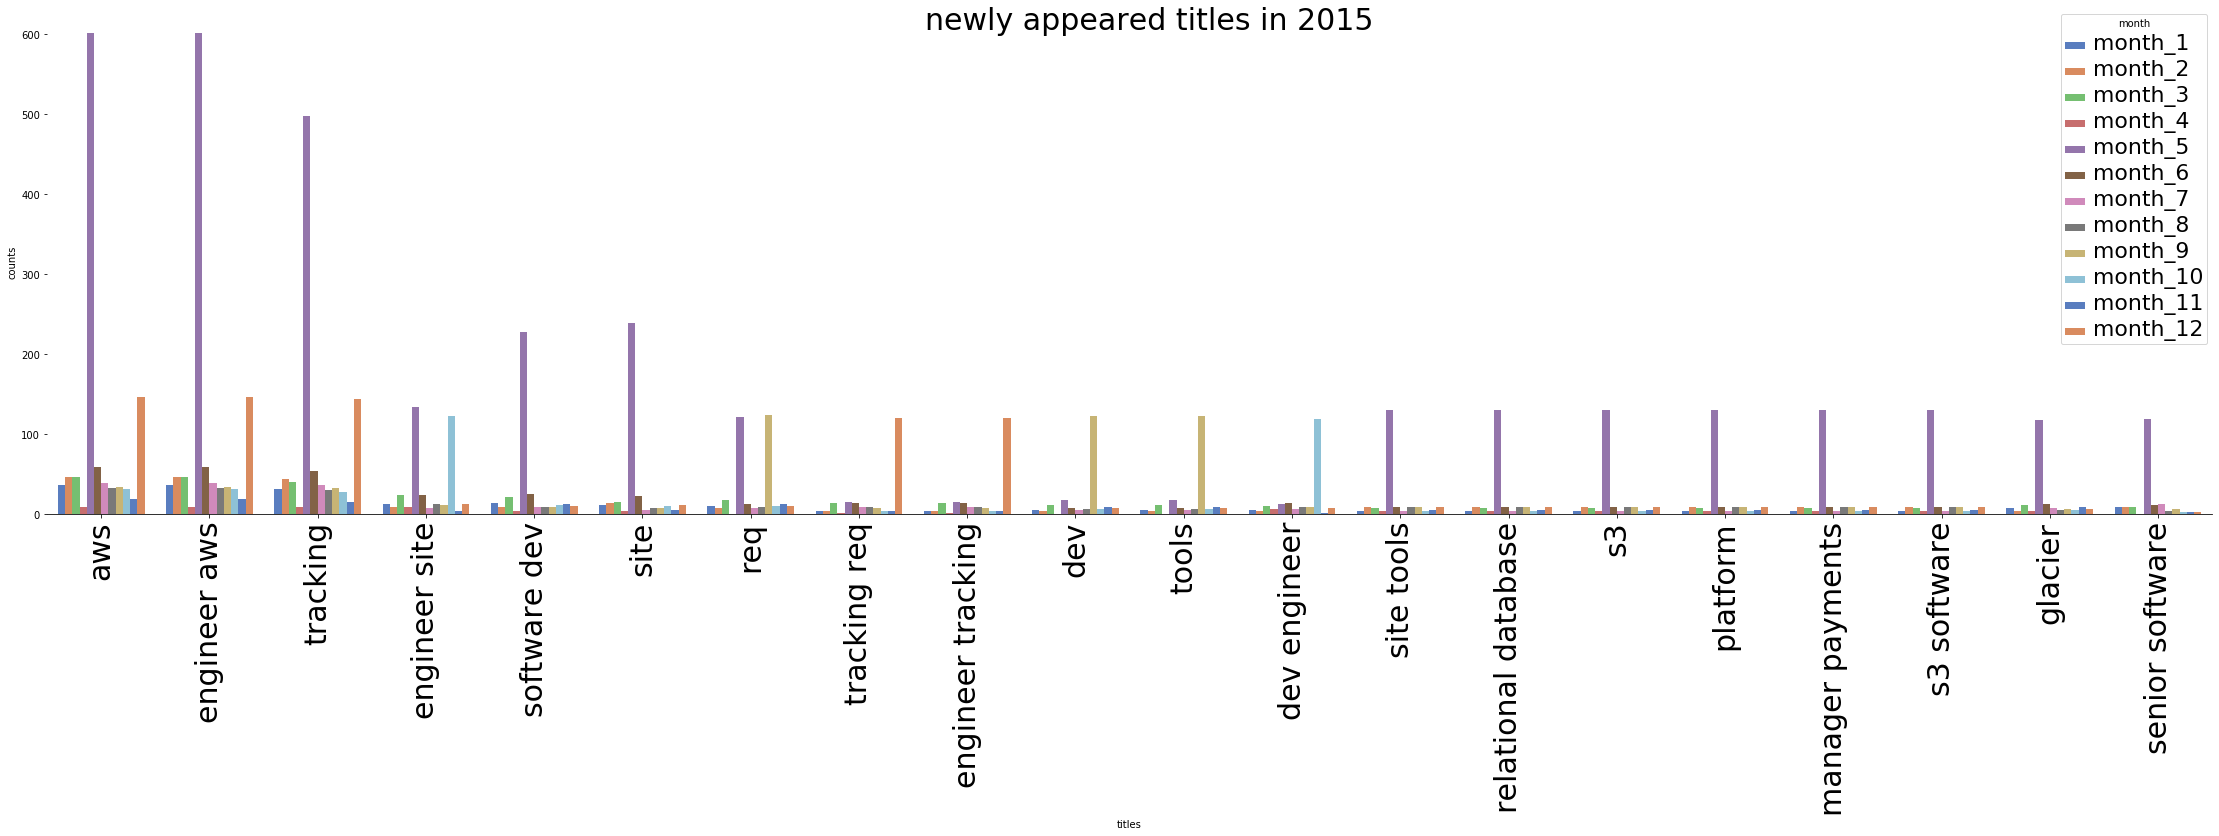

In [18]:
titleMonth2015=aggtable_2factor(title2015_M,newtitle2015)
Amazon2015 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2014,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2015.despine(left=True)
Amazon2015.fig.suptitle('newly appeared titles in 2015',fontsize=30)
Amazon2015.set_ylabels("counts")
Amazon2015.set_xticklabels([t.split('_')[1]for t in newtitle2015],rotation=90,fontsize=30)
for ax in Amazon2015.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2015.fig.set_size_inches(40,8)

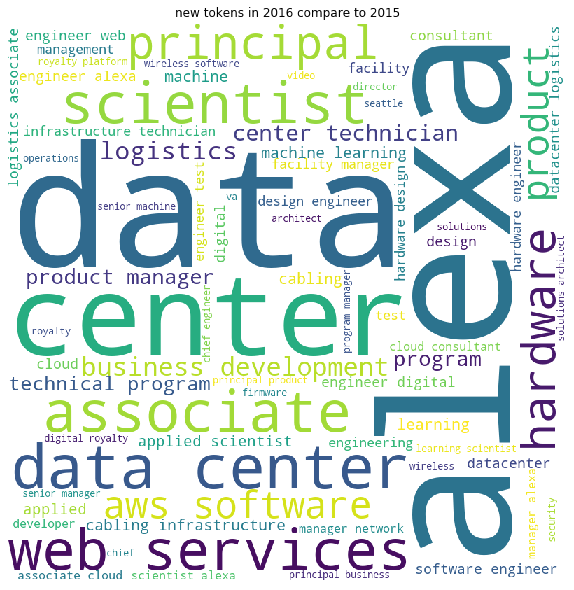

In [19]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2016notin2015_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2016 compare to 2015')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

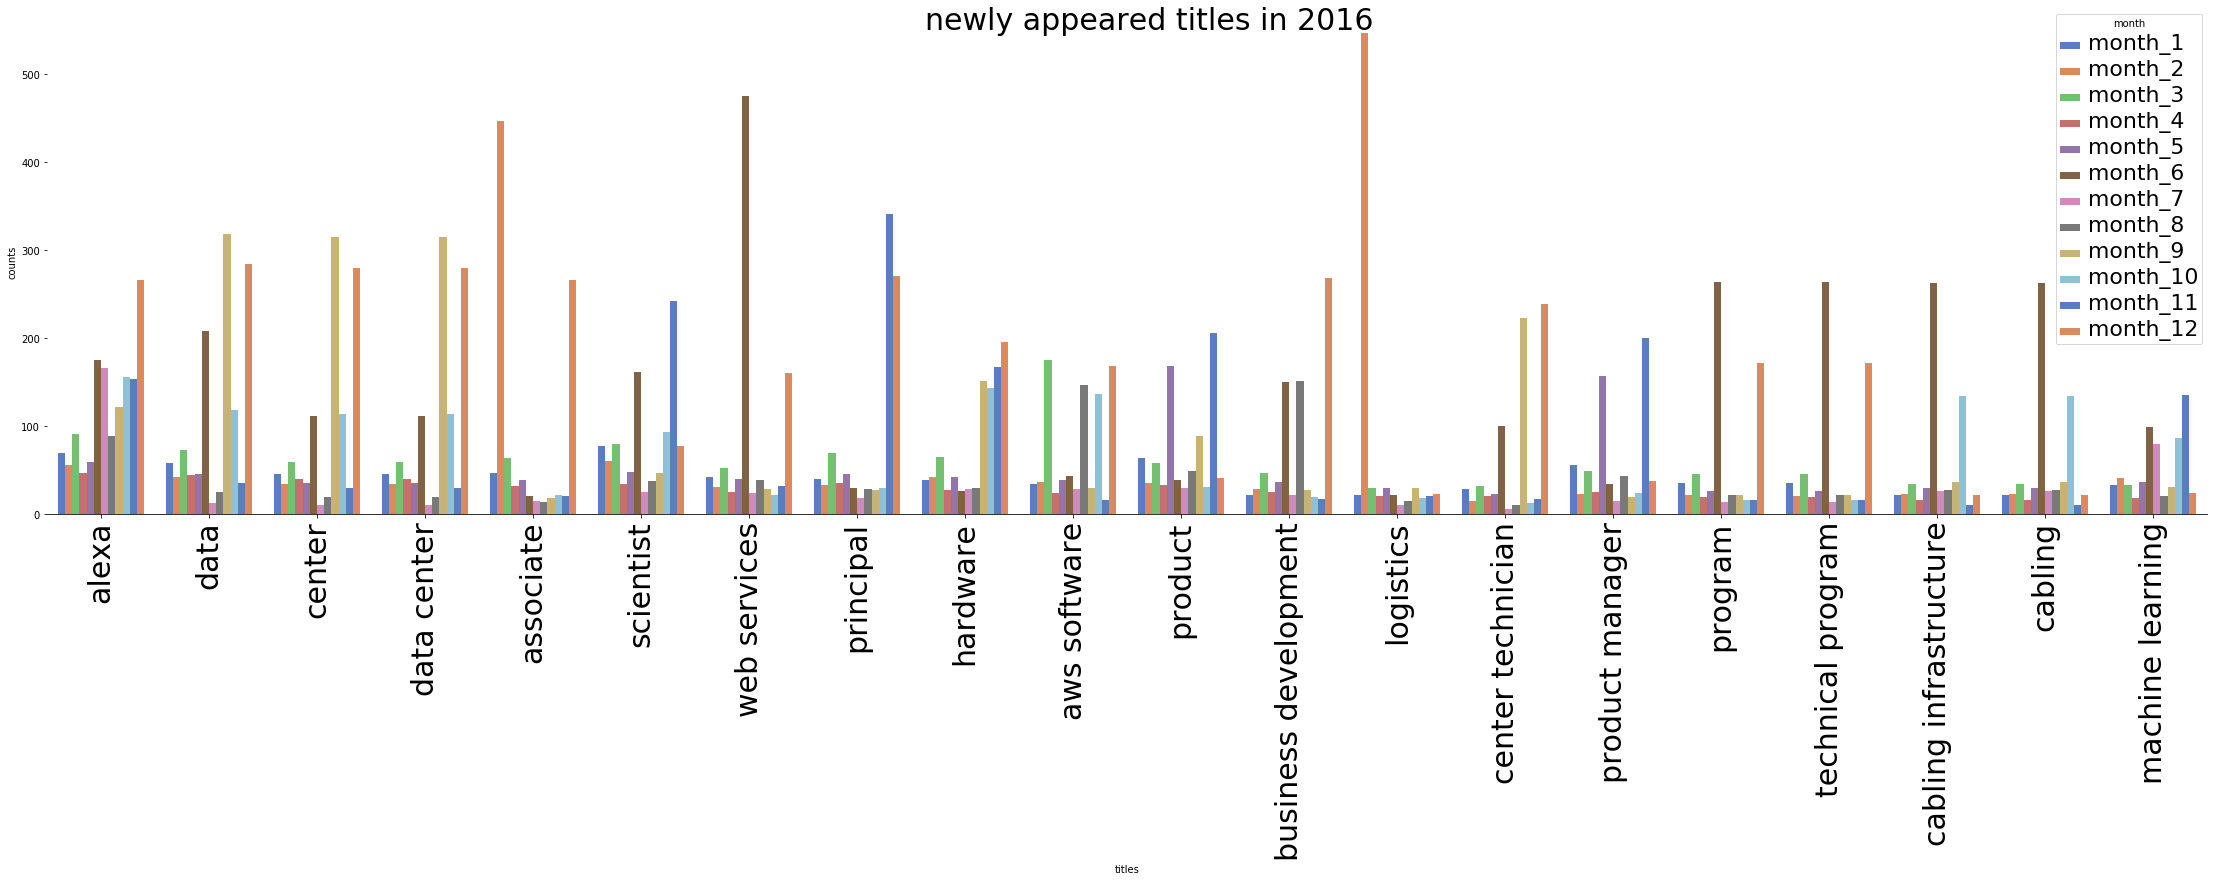

In [20]:
titleMonth2016=aggtable_2factor(title2016_M,newtitle2016)
Amazon2016 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2016,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2016.despine(left=True)
Amazon2016.fig.suptitle('newly appeared titles in 2016',fontsize=30)
Amazon2016.set_ylabels("counts")
Amazon2016.set_xticklabels([t.split('_')[1]for t in newtitle2016],rotation=90,fontsize=30)
for ax in Amazon2016.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2016.fig.set_size_inches(40,8)

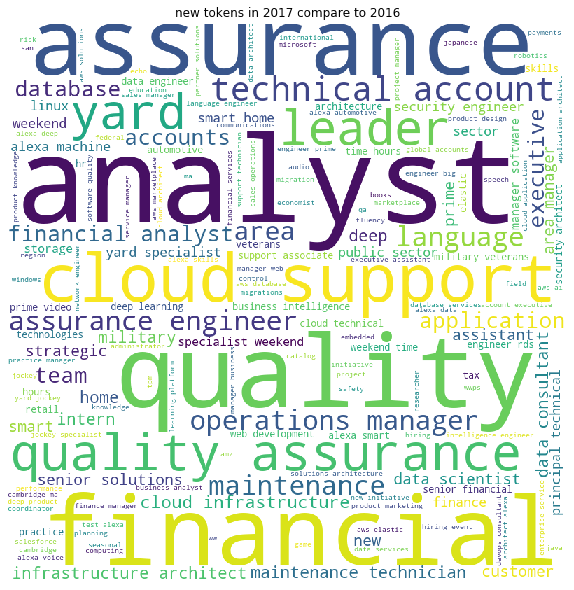

In [21]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2017notin2016_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2017 compare to 2016')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

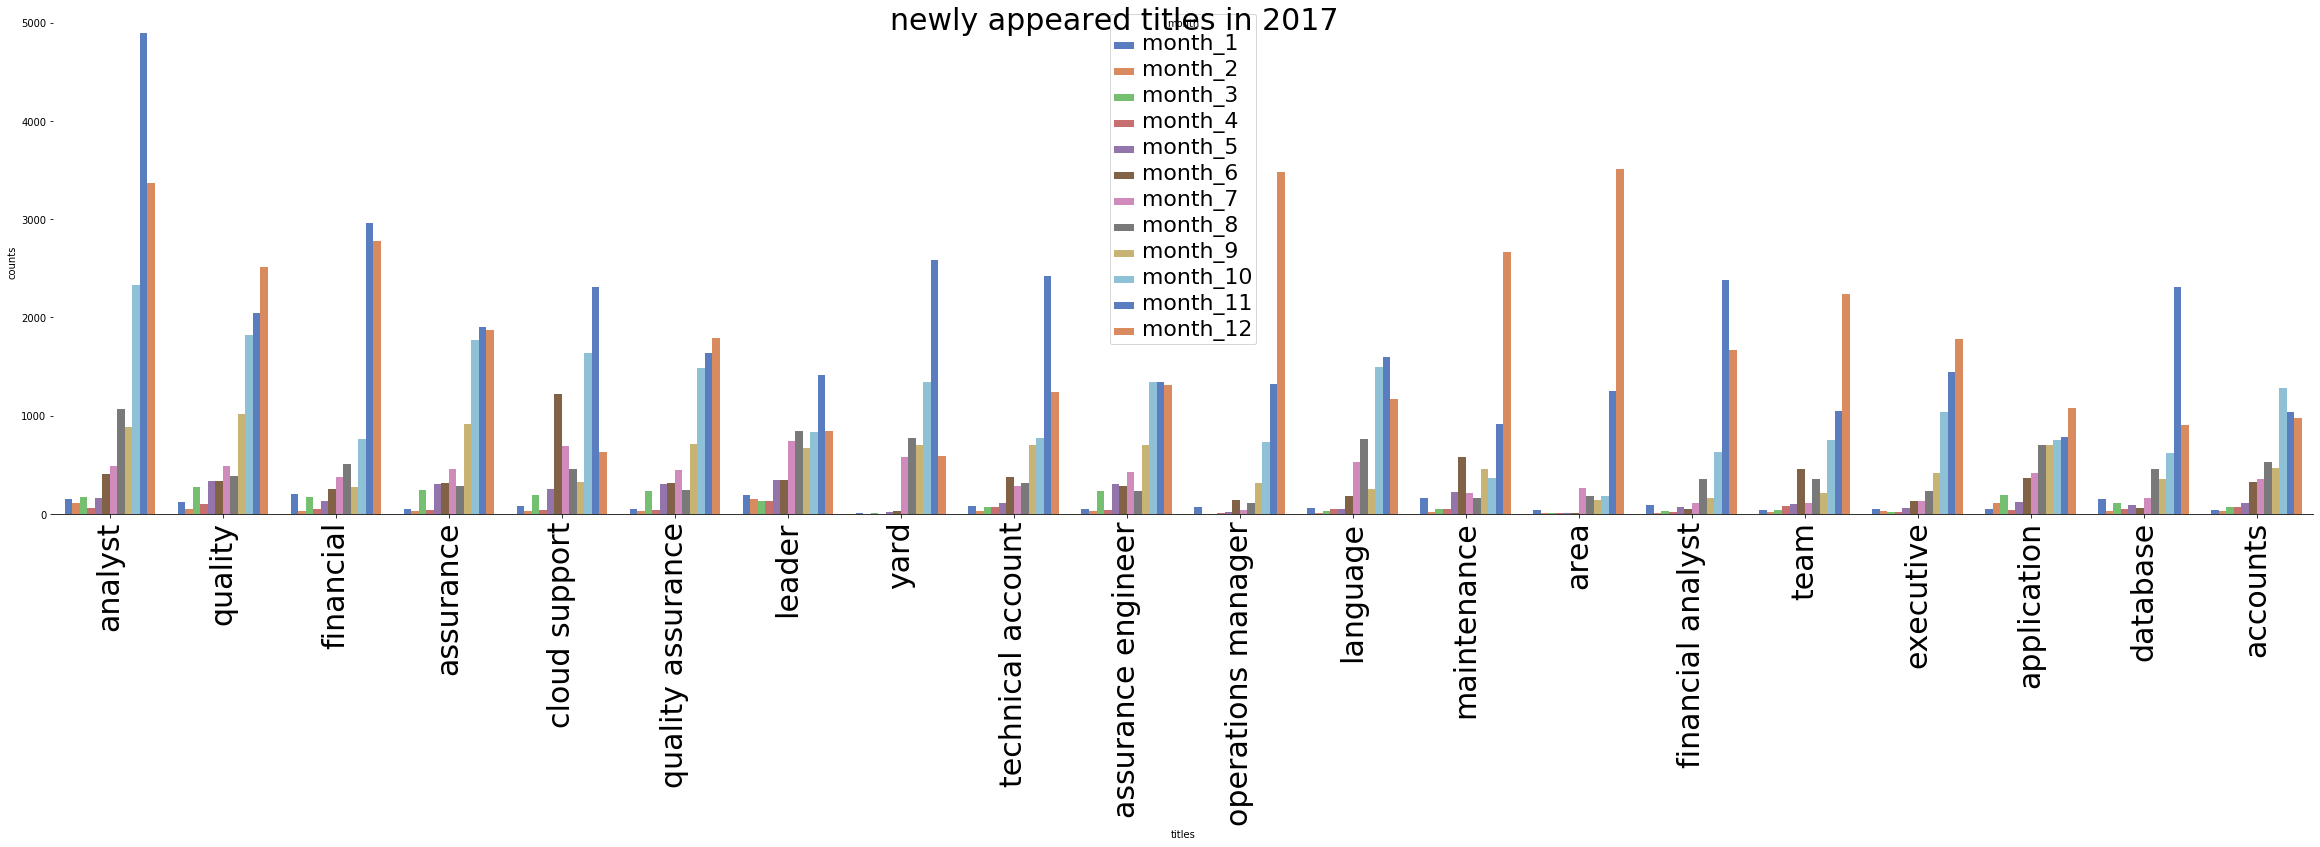

In [22]:
titleMonth2017=aggtable_2factor(title2017_M,newtitle2017)
Amazon2017 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2017,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2017.despine(left=True)
Amazon2017.fig.suptitle('newly appeared titles in 2017',fontsize=30)
Amazon2017.set_ylabels("counts")
Amazon2017.set_xticklabels([t.split('_')[1]for t in newtitle2017],rotation=90,fontsize=30)
for ax in Amazon2017.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2017.fig.set_size_inches(40,8)

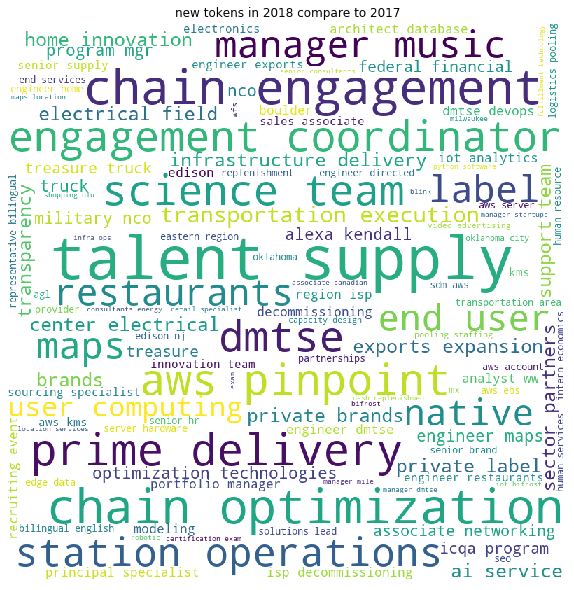

In [23]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2018notin2017_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2018 compare to 2017')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

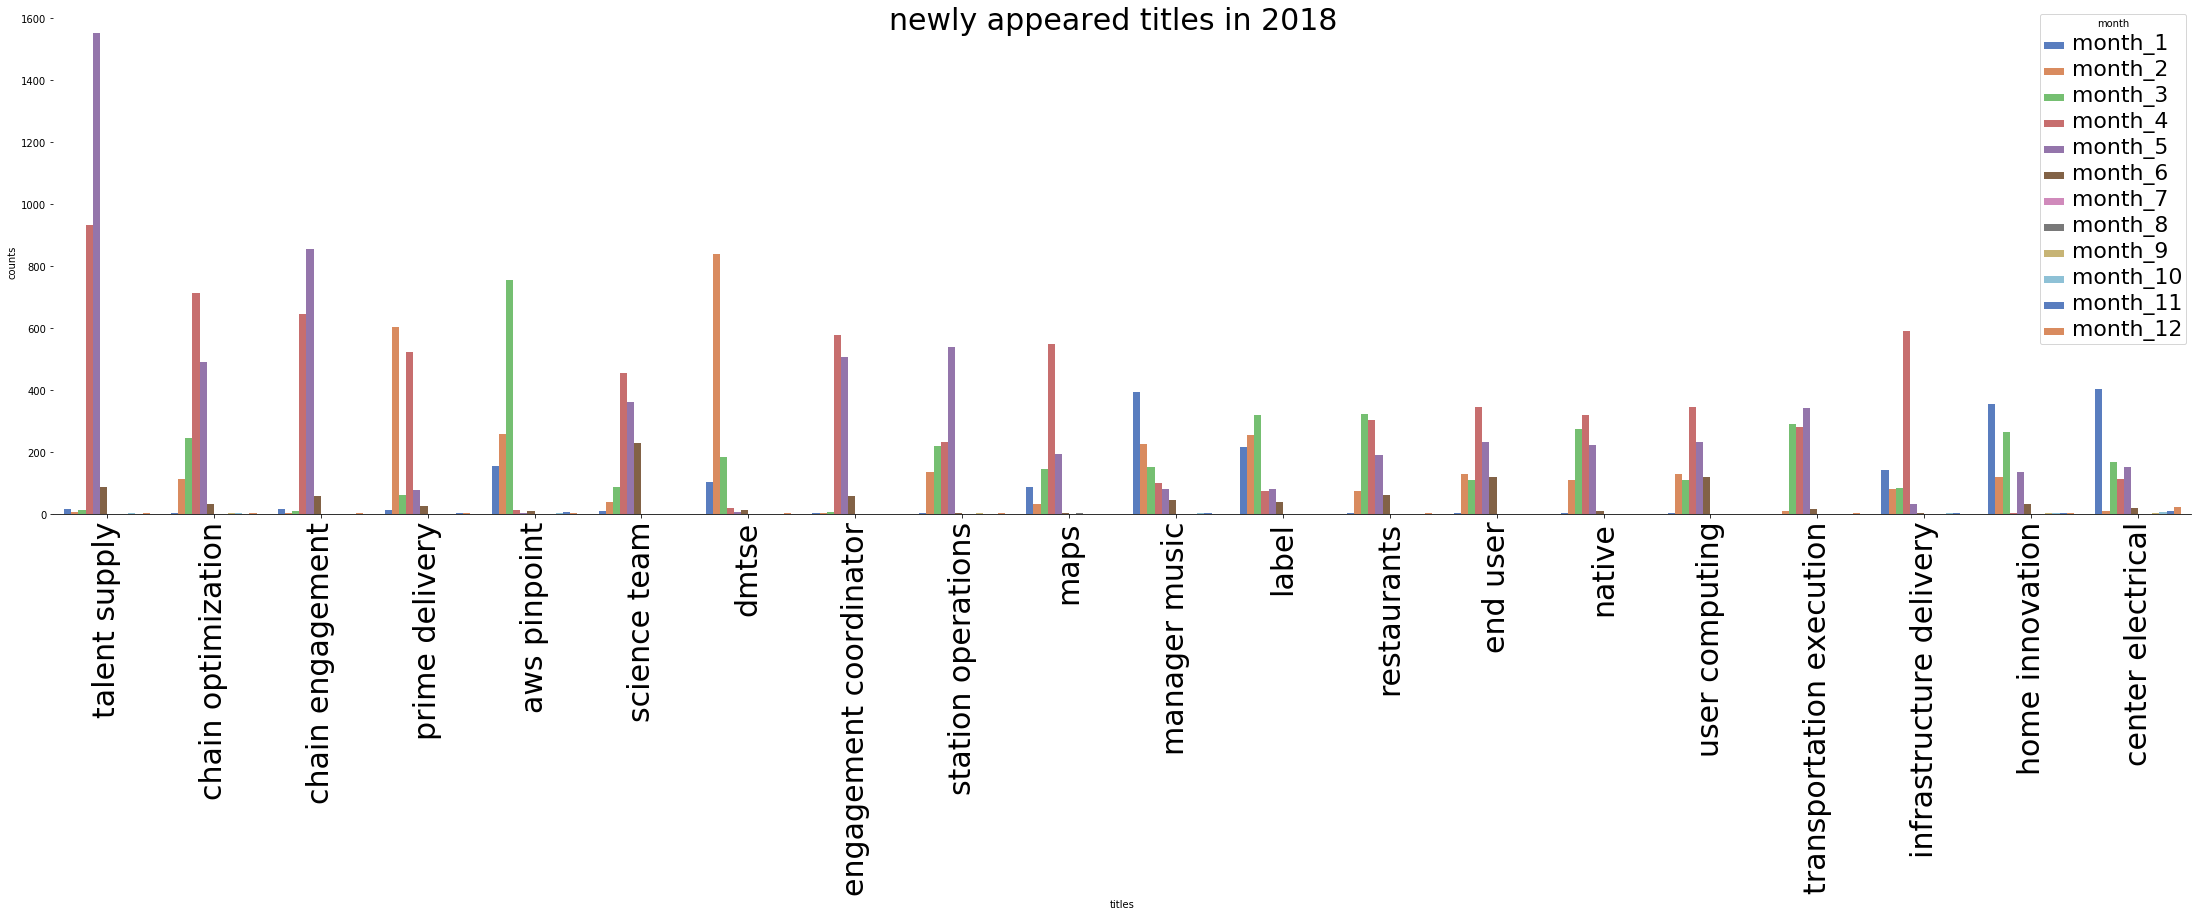

In [24]:
titleMonth2018=aggtable_2factor(title2018_M,newtitle2018)
Amazon2018 = sns.catplot(x="titles", y="counts", hue="month", data=titleMonth2018,
                height=6, kind="bar", palette="muted",legend_out=False)
Amazon2018.despine(left=True)
Amazon2018.fig.suptitle('newly appeared titles in 2018',fontsize=30)
Amazon2018.set_ylabels("counts")
Amazon2018.set_xticklabels([t.split('_')[1]for t in newtitle2018],rotation=90,fontsize=30)
for ax in Amazon2018.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize=22) 
Amazon2018.fig.set_size_inches(40,8)